In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve

In [4]:
data = pd.read_csv('dataset.csv')

In [6]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [115]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [8]:
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [118]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(203, 30) (100, 30)
(203,) (100,)


# modling

In [ ]:
#creating pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import xgboost
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import time
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# comparision of models performance using cross validation

In [12]:

def Classifier_train_modelCV(model, X,y):
    start = time.time()
    
    y_pred = cross_val_predict(model, X, y, cv=3)
    prec = precision_score(y, y_pred)
    recal = recall_score(y, y_pred) 
    f1scor = f1_score(y, y_pred)
    

    try:
        y_scores = cross_val_predict(model, X, y, cv=3,method="decision_function")
    except:   
        y_probas  = cross_val_predict(model,X, y, cv=3,method="predict_proba")
        y_scores = y_probas[:, 1] 
        
    auc = roc_auc_score(y, y_scores)
    AP = metrics.average_precision_score(y, y_scores)
    
    CV_execution_time = time.time()-start
    
    
    
    model_and_predictions_dictionary = {'classification': str(model),
                                        "precision":prec,
                                        "recall(sensity)":recal,
                                        "f1-score": f1scor,
                                        "AUC":auc,
                                        'avg precision':AP,
                                        'CV_execution_time': CV_execution_time,
                                       }
    
    performances = pd.DataFrame([[str(model), np.round(prec, 2),np.round(recal, 2),np.round(f1scor, 2),np.round(auc, 2),np.round(AP, 2), CV_execution_time]], 
                           columns=['ClassificationCV','Precision','Recall','F1score','AUC','Avarage precision','CV_execution_time'])
    
    return model_and_predictions_dictionary, performances
    


    


In [13]:

pipe1 = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe2 = make_pipeline(StandardScaler(),SVC(random_state=42))
pipe3 = make_pipeline(StandardScaler(), sklearn.linear_model.LogisticRegression(random_state=42))


In [14]:
classifiers_dictionary={
                        'kneighbour': pipe1,
                        'SVC': pipe2,
                        'SGDClassifier':sklearn.linear_model.SGDClassifier(random_state=42, loss ='log_loss'),
                        'Logistic regression':pipe3, 
                        'Decision tree - unlimited depth':sklearn.tree.DecisionTreeClassifier(random_state=42), 
                        'Random forest': sklearn.ensemble.RandomForestClassifier(random_state=42,n_jobs=-1),
                        'XGBoost':xgboost.XGBClassifier(random_state=42,n_jobs=-1),
                       }



dataframe = pd.DataFrame()
for classifier_name in classifiers_dictionary:
    model_and_predictions_dictionary,performances  = Classifier_train_modelCV(classifiers_dictionary[classifier_name], X_train,y_train)
    dataframe = dataframe.append(performances)

    




In [20]:
dataframe = dataframe.reset_index(drop =True)

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"Pipeline(steps=[('standardscaler', StandardSca...",0.82,0.88,0.85,0.863668,0.833894,1.211936
1,"Pipeline(steps=[('standardscaler', StandardSca...",0.82,0.88,0.85,0.890954,0.891673,0.227988
2,"SGDClassifier(loss='log_loss', random_state=42)",0.62,0.50,0.55,0.604523,0.665485,0.234984
3,"Pipeline(steps=[('standardscaler', StandardSca...",0.84,0.89,0.87,0.902262,0.903510,0.848949
4,DecisionTreeClassifier(random_state=42),0.78,0.81,0.79,0.758210,0.734726,0.113994
5,"RandomForestClassifier(n_jobs=-1, random_state...",0.82,0.86,0.84,0.900147,0.911925,6.201672
6,"XGBClassifier(base_score=None, booster=None, c...",0.84,0.82,0.83,0.880433,0.885327,1.428923


In [28]:
dataframe['ClassificationCV'] = ['KNeighborsClassifier', 'SVC','SGDclassifier','logisticregression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']

In [29]:
dataframe

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,KNeighborsClassifier,0.82,0.88,0.85,0.863668,0.833894,1.211936
0,SVC,0.82,0.88,0.85,0.890954,0.891673,0.227988
0,SGDclassifier,0.62,0.50,0.55,0.604523,0.665485,0.234984
0,logisticregression,0.84,0.89,0.87,0.902262,0.903510,0.848949
0,DecisionTreeClassifier,0.78,0.81,0.79,0.758210,0.734726,0.113994
0,RandomForestClassifier,0.82,0.86,0.84,0.900147,0.911925,6.201672
0,XGBClassifier,0.84,0.82,0.83,0.880433,0.885327,1.428923


### top 3 models based on AUC score

In [58]:
dataframe.sort_values(['AUC'],ascending=False).head(3)

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
3,logisticregression,0.84,0.89,0.87,0.902262,0.903510,0.848949
5,RandomForestClassifier,0.82,0.86,0.84,0.900147,0.911925,6.201672
1,SVC,0.82,0.88,0.85,0.890954,0.891673,0.227988


The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

### top 3 models based on average precision

In [59]:
dataframe.sort_values([ 'Avarage precision'],ascending=False).head(3)

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
5,RandomForestClassifier,0.82,0.86,0.84,0.900147,0.911925,6.201672
3,logisticregression,0.84,0.89,0.87,0.902262,0.903510,0.848949
1,SVC,0.82,0.88,0.85,0.890954,0.891673,0.227988


# ROC curve

In [23]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn import metrics

def get_values_forROC(model, X,y):   
    y_pred = cross_val_predict(model, X, y, cv=3)
    try:
        y_scores = cross_val_predict(model, X, y, cv=3,method="decision_function")
    except:   
        y_probas  = cross_val_predict(model,X, y, cv=3,method="predict_proba")
        y_scores = y_probas[:, 1] 
        
    
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    return fpr, tpr, thresholds
   

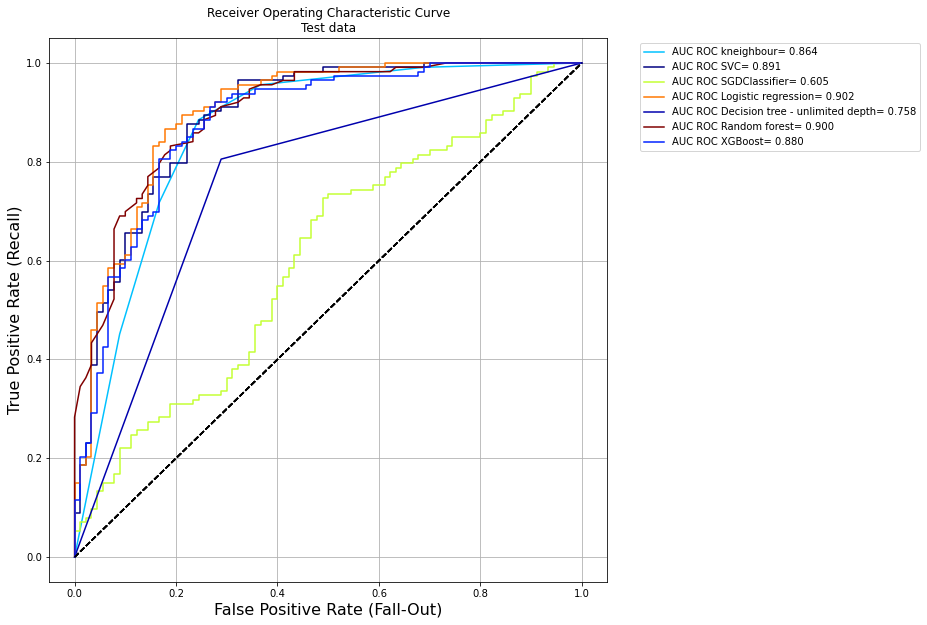

In [56]:
#roc curvre

#%%capture
roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={
        'kneighbour':cmap(80),'SVC':cmap(0),'SGDClassifier':cmap(150),'Logistic regression':cmap(200),  
        'Decision tree - unlimited depth':cmap(10),
        'Random forest':cmap(300), 'XGBoost':cmap(40)}


    
for classifier_name in classifiers_dictionary:
    
    FPR_list, TPR_list, threshold = get_values_forROC(classifiers_dictionary[classifier_name], X_train,y_train)
    ROC_AUC = metrics.auc(FPR_list, TPR_list)

    ax.plot(FPR_list, TPR_list, 'b', color=colors[classifier_name], label = 'AUC ROC {0}= {1:0.3f}'.format(classifier_name,ROC_AUC))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.title('Receiver Operating Characteristic Curve\nTest data')
    plt.grid(True)

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

# PRcurve

In [ ]:
classifiers_dictionary={
                        'kneighbour': pipe1,
                        'SVC': pipe2,
                        'SGDClassifier':sklearn.linear_model.SGDClassifier(random_state=42, loss ='log_loss'),
                        'Logistic regression':pipe3, 
                        'Decision tree - unlimited depth':sklearn.tree.DecisionTreeClassifier(random_state=42), 
                        'Random forest': sklearn.ensemble.RandomForestClassifier(random_state=42,n_jobs=-1),
                        'XGBoost':xgboost.XGBClassifier(random_state=42,n_jobs=-1),
                       }

In [262]:
#roc curve
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

def get_values_forPR(model, X,y):   
    y_pred = cross_val_predict(model, X, y, cv=3)
    try:
        y_scores = cross_val_predict(model, X, y, cv=3,method="decision_function")
    except:   
        y_probas  = cross_val_predict(model,X, y, cv=3,method="predict_proba")
        y_scores = y_probas[:, 1] 
    AP = metrics.average_precision_score(y, y_scores)
    
    precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
    return precisions, recalls, thresholds, AP
   

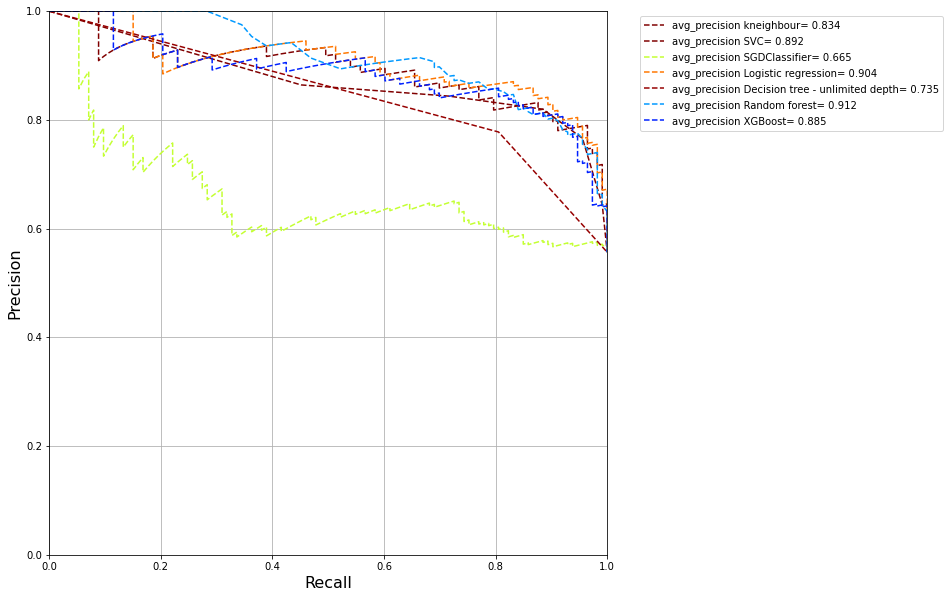

In [264]:
roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={
        'kneighbour':cmap(700),'SVC':cmap(330),'SGDClassifier':cmap(150),'Logistic regression':cmap(200),  
        'Decision tree - unlimited depth':cmap(250),
        'Random forest':cmap(70), 'XGBoost':cmap(40)}


for classifier_name in classifiers_dictionary:
    
    

    precision, recall, threshold, AP=  get_values_forPR(classifiers_dictionary[classifier_name], X_train,y_train)
    precision=precision[::-1]
    recall=recall[::-1]
  
    ax.plot(recall ,precision, "b--", color=colors[classifier_name], label = 'avg_precision {0}= {1:0.3f}'.format(classifier_name,AP))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

# curves for top 3 classifiers

In [60]:
classifiers_dictionary={
                        'Random forest': sklearn.ensemble.RandomForestClassifier(random_state=42,n_jobs=-1),
                        'SVC': pipe2,
                        'Logistic regression':pipe3 }
                        
                        
                        
                       

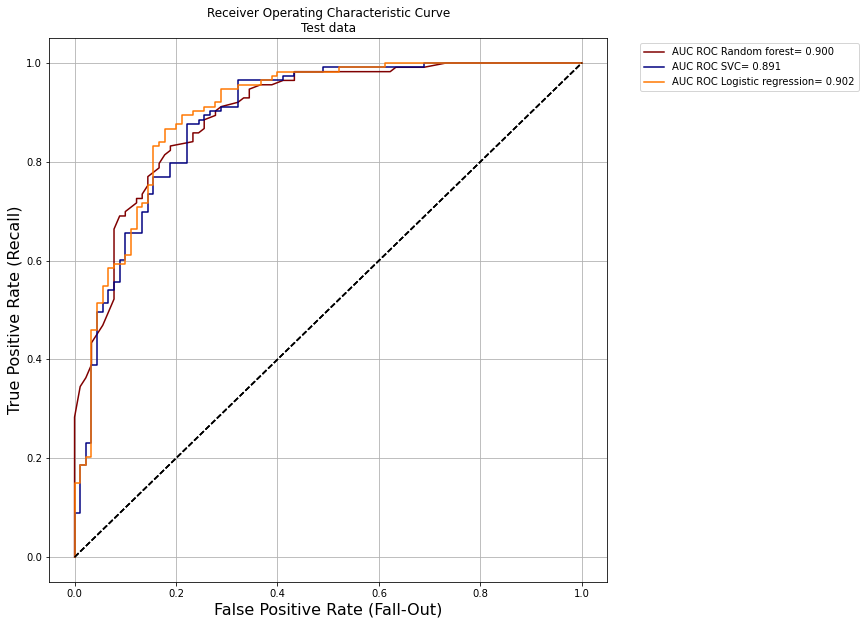

In [61]:
#roc curvre

#%%capture
roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={
        'kneighbour':cmap(80),'SVC':cmap(0),'SGDClassifier':cmap(150),'Logistic regression':cmap(200),  
        'Decision tree - unlimited depth':cmap(10),
        'Random forest':cmap(300), 'XGBoost':cmap(40)}


    
for classifier_name in classifiers_dictionary:
    
    FPR_list, TPR_list, threshold = get_values_forROC(classifiers_dictionary[classifier_name], X_train,y_train)
    ROC_AUC = metrics.auc(FPR_list, TPR_list)

    ax.plot(FPR_list, TPR_list, 'b', color=colors[classifier_name], label = 'AUC ROC {0}= {1:0.3f}'.format(classifier_name,ROC_AUC))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.title('Receiver Operating Characteristic Curve\nTest data')
    plt.grid(True)

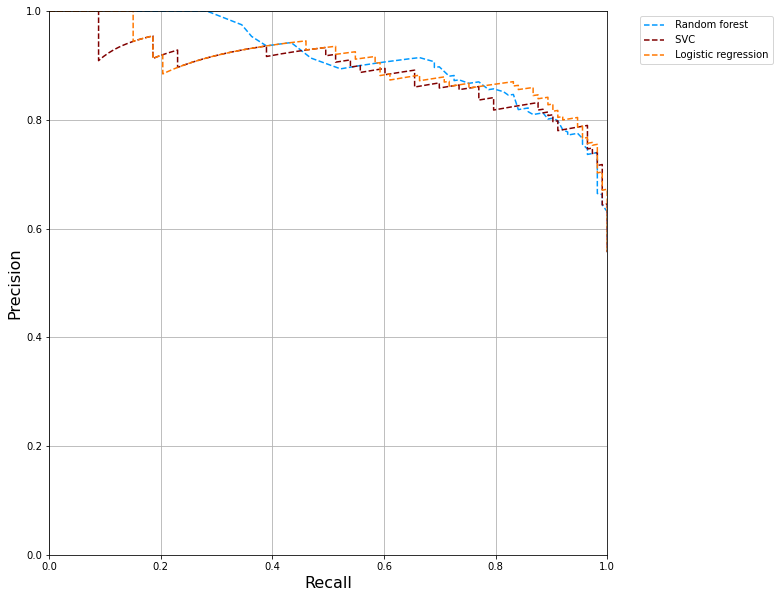

In [62]:
roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={
        'kneighbour':cmap(700),'SVC':cmap(330),'SGDClassifier':cmap(150),'Logistic regression':cmap(200),  
        'Decision tree - unlimited depth':cmap(250),
        'Random forest':cmap(70), 'XGBoost':cmap(40)}


for classifier_name in classifiers_dictionary:
    
    

    precision, recall, threshold,AP=  get_values_forPR(classifiers_dictionary[classifier_name], X_train,y_train)
    precision=precision[::-1]
    recall=recall[::-1]
  
    ax.plot(recall ,precision, "b--", color=colors[classifier_name], label = 'avg_precision {0}= {1:0.3f}'.format(classifier_name,AP))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

# model selection

In [80]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [81]:
p_class =np.round(165/(165+138)*100)
n_class =100 - p_class 
print("the praportion of the positive class is {}% and the negiative class is {}% which is kind of balanced".format(p_class, n_class))

the praportion of the positive class is 54.0% and the negiative class is 46.0% which is kind of balanced


 As a rule
of thumb, you should prefer the PR curve(the avg precision metric) whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve(AUC metric) otherwise.

in our dataset praportion of the positive class is 56.0% and the negiative class is 44.0% which is kind of balanced so we will go with auc metric. and will choose the logistic regression as our final model

# Parameter tunning with grid search CV

###### model selected ---LogisticRegression ---------parameters

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized

a good way to reduce overfitting is to regularize the
model (i.e., to constrain it):
    
The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean

An important characteristic of Lasso Regression is that it tends to completely elimi‐
nate the weights of the least important features (i.e., set them to zero)

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge in Figure 2-12.
Stronger regularization pushes coefficients more and more toward
zero, though coefficients never become exactly zero. I

If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features

In [16]:
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(random_state=42)
pipe = Pipeline(steps=[("scaler", scaler),  ("logistic", logistic)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    
    "logistic__C": np.logspace(-4, 4, 4),
    'logistic__solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'logistic__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
}

grid = GridSearchCV(pipe, param_grid, n_jobs=2, scoring= 'roc_auc')
grid.fit(X_train, y_train)

print("best parameters for logisticregression", grid.best_params_)
print("best AUC score for logisticregression", grid.best_score_)
best_model = grid.best_estimator_
print("best model for logisticregression", best_model)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=2,
             param_grid={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'logistic__penalty': ['l1', 'l2', 'elasticnet',
                                               'none'],
                         'logistic__solver': ('newton-cg', 'lbfgs', 'liblinear',
                                              'sag', 'saga')},
             scoring='roc_auc')

In [19]:
print("best parameters for logisticregression \n", grid.best_params_)
print("best AUC score for logisticregression \n", grid.best_score_)
best_model = grid.best_estimator_
print("best model for logisticregression", best_model)

best parameters for logisticregression 
 {'logistic__C': 0.046415888336127774, 'logistic__penalty': 'l2', 'logistic__solver': 'newton-cg'}
best AUC score for logisticregression 
 0.9293148880105402
best model for logisticregression Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.046415888336127774, random_state=42,
                                    solver='newton-cg'))])


In [ ]:
#save model


# now evaluate model and prediction with test dataset

In [67]:


def performance_curve_parameters(model, X,y,curve):
    
    y_pred = model.predict(X)
    y_scores = model.decision_function(X)
    auc = roc_auc_score(y, y_scores)
    AP = metrics.average_precision_score(y, y_scores)
    
    if curve == 'ROC':
        fpr, tpr, thresholds = roc_curve(y, y_scores)
        return fpr, tpr, thresholds, AP, auc
    
    elif curve == 'PR':
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
        return precisions, recalls, thresholds

In [68]:
#import warnings
#warnings.filterwarnings('ignore')

def performance_parameters(model, X,y):
        
    y_pred = model.predict(X)
    
    y_prob = model.predict_proba(X)
    #y_scores = y_prob[:, 1]
    y_scores = model.decision_function(X)
    
    auc = roc_auc_score(y, y_scores)
    AP = metrics.average_precision_score(y, y_scores)
    
    prec = precision_score(y, y_pred)
    recal = recall_score(y, y_pred) 
    f1scor = f1_score(y, y_pred)

    CMtrx = confusion_matrix(y,y_pred)
    report = metrics.classification_report(y, y_pred)

    model_and_predictions_dictionary = {'best model': str(model),
                                            "precision":prec,
                                            "recall(sensity)":recal,
                                            "f1-score": f1scor,
                                            "AUC":auc,

                                           }

    performances = pd.DataFrame([[str(model), np.round(prec, 2),np.round(recal, 2),np.round(f1scor, 2),auc,AP]], 
                               columns=['Best model','Precision','Recall','F1score','AUC','Avarage precision'])

    return CMtrx, performances, report,y_pred, y_prob, y_scores
    
    

    


### prediction table

In [ ]:
confusion_mtrx, DF, clas_report,pred, prob, scorrres = performance_parameters(best_model, X_test,y_test)

In [40]:
test_prediction = X_test.copy()
test_prediction['Y_test'] = y_test

test_prediction['Y_pred'] = pred
test_prediction['Y_prob'] = np.round(prob[:,1],2)
test_prediction['Y_score'] = np.round(scorrres,2)

In [66]:
test_prediction[['Y_test','Y_pred','Y_prob','Y_score']].head(60)

,Y_test,Y_pred,Y_prob,Y_score
225,0,0,0.16,-1.66
152,1,0,0.49,-0.06
228,0,0,0.48,-0.07
201,0,0,0.04,-3.18
52,1,0,0.18,-1.52
245,0,0,0.35,-0.61
175,0,0,0.14,-1.80
168,0,0,0.10,-2.22
223,0,0,0.03,-3.42
217,0,0,0.04,-3.30


### analysising different performance metrixs for test dataset

In [29]:
print('various performance metrix',DF)

,Best model,Precision,Recall,F1score,AUC,Avarage precision
0,"Pipeline(steps=[('scaler', StandardScaler()),\...",0.84,0.83,0.83,0.917067,0.93289


In [35]:
print("confusion_mtrx",confusion_mtrx)

array([[40,  8],
       [ 9, 43]], dtype=int64)

In [36]:
print(clas_report)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.84      0.83      0.83        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



# threshold manupulation 

In [84]:
#import warnings
#warnings.filterwarnings('ignore')

def PRthreshold_manipulated_performance_parameters(model, X,y, precision_percentage):
    
    
           
        
    """y_pred = model.predict(X)
    y_prob = model.de(X)
    y_scores = y_prob[:, 1]"""
    
    y_prob = model.predict_proba(X)
    y_scores = model.decision_function(X)
    
    precisions, recalls, PR_thresholds = performance_curve_parameters(model, X,y,curve = 'PR')
    
    threshold_precision = PR_thresholds[np.argmax(precisions>=precision_percentage)]
    
    y_pred = (y_scores >= threshold_precision)
    
    auc = roc_auc_score(y, y_scores)
    AP = metrics.average_precision_score(y, y_scores)
    
    prec = precision_score(y, y_pred)
    recal = recall_score(y, y_pred) 
    f1scor = f1_score(y, y_pred)

    CMtrx = confusion_matrix(y,y_pred)
    report = metrics.classification_report(y, y_pred)

    model_and_predictions_dictionary = {'best model': str(model),
                                            "precision":prec,
                                            "recall(sensity)":recal,
                                            "f1-score": f1scor,
                                            'threshold_precision':threshold_precision,
                                            "AUC":auc,

                                           }

    performances = pd.DataFrame([[str(model), np.round(prec, 2),np.round(recal, 2),np.round(f1scor, 2),threshold_precision,AP]], 
                               columns=['Best model','Precision','Recall','F1score','threshold_precision','Avarage precision'])

    return CMtrx, performances, report, y_pred, y_prob,y_scores
    
    

    


In [112]:
#import warnings
#warnings.filterwarnings('ignore')

def ROCthreshold_manipulated_performance_parameters(model, X,y, recall_percentage):
    
    
           
        
    """y_pred = model.predict(X)
    y_prob = model.predict_proba(X)
    y_scores = y_prob[:, 1]
    """
    y_prob = model.predict_proba(X)
    y_scores = model.decision_function(X)
    
    fpr, tpr, ROC_thresholds, AP, auc = performance_curve_parameters(model, X,y,curve = 'ROC')
    recalls_from_roc = tpr
    ROC_threshold_recall = ROC_thresholds[np.argmax(recalls_from_roc>=recall_percentage)]
    
    y_pred = (y_scores >= ROC_threshold_recall)
    
    auc = roc_auc_score(y, y_scores)
    AP = metrics.average_precision_score(y, y_scores)
    
    prec = precision_score(y, y_pred)
    recal = recall_score(y, y_pred) 
    f1scor = f1_score(y, y_pred)

    CMtrx = confusion_matrix(y,y_pred)
    report = metrics.classification_report(y, y_pred)

    model_and_predictions_dictionary = {'best model': str(model),
                                            "precision":prec,
                                            "recall(sensity)":recal,
                                            "f1-score": f1scor,
                                          'ROC_threshold_recall':ROC_threshold_recall,
                                            "AUC":auc,

                                           }

    performances = pd.DataFrame([[str(model), np.round(prec, 2),np.round(recal, 2),np.round(f1scor, 2),ROC_threshold_recall,auc]], 
                               columns=['Best model','Precision','Recall','F1score','threshold_recall','AUC'])

    return CMtrx, performances, report, y_pred, y_prob,y_scores
    
    

    


### lets want to manupulate the precision we will use the avg precision metrics or PR curve metrix


#### precision = 90%

In [87]:
CMtrx, performances, report, new_pred,prob, scor  = PRthreshold_manipulated_performance_parameters(best_model, X_test,y_test, precision_percentage=0.90)

In [78]:
performances

,Best model,Precision,Recall,F1score,threshold_precision,Avarage precision
0,"Pipeline(steps=[('scaler', StandardScaler()),\...",0.91,0.77,0.83,0.723929,0.93289


In [79]:
CMtrx

array([[44,  4],
       [12, 40]], dtype=int64)

In [80]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        48
           1       0.91      0.77      0.83        52

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



#### prediction table for 90% precision

In [90]:
p90_precision = pd.DataFrame()
p90_precision['y_test'] = y_test
p90_precision['y_pred'] = new_pred
p90_precision['y_prob'] = np.round(prob[:,1],2)
p90_precision['y_score'] = np.round(scor,2)

In [92]:
p90_precision.head(60)

,y_test,y_pred,y_prob,y_score
225,0,False,0.16,-1.66
152,1,False,0.49,-0.06
228,0,False,0.48,-0.07
201,0,False,0.04,-3.18
52,1,False,0.18,-1.52
245,0,False,0.35,-0.61
175,0,False,0.14,-1.80
168,0,False,0.10,-2.22
223,0,False,0.03,-3.42
217,0,False,0.04,-3.30


### lets want to manupulate the recall we will use the AUC or ROC curve metrix


#### recall = 90%

In [93]:
CMtrx, performances,  report, new_pred,prob, scor  = ROCthreshold_manipulated_performance_parameters(best_model, X_test,y_test, recall_percentage=0.90)

In [94]:
performances

,Best model,Precision,Recall,F1score,threshold_recall,AUC
0,"Pipeline(steps=[('scaler', StandardScaler()),\...",0.8,0.92,0.86,-0.529712,0.917067


In [95]:
CMtrx

array([[36, 12],
       [ 4, 48]], dtype=int64)

In [96]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        48
           1       0.80      0.92      0.86        52

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



#### prediction table for 90% recall

In [99]:
p90_precision2 = pd.DataFrame()
p90_precision2['y_test'] = y_test
p90_precision2['y_pred'] = new_pred
p90_precision2['y_prob'] = np.round(prob[:,1],2)
p90_precision2['y_score'] = np.round(scor,2)

In [101]:
p90_precision2.head(60)

,y_test,y_pred,y_prob,y_score
225,0,False,0.16,-1.66
152,1,True,0.49,-0.06
228,0,True,0.48,-0.07
201,0,False,0.04,-3.18
52,1,False,0.18,-1.52
245,0,False,0.35,-0.61
175,0,False,0.14,-1.80
168,0,False,0.10,-2.22
223,0,False,0.03,-3.42
217,0,False,0.04,-3.30


## Lower the threshold in our model
Since the model is predicting Heart disease too many type II errors(False negiative) is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered.

# threshold manupulation explain through curves

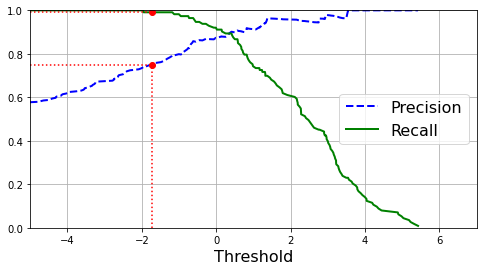

In [211]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-5, 7, 0, 1])             # threshold scale




recall_90_precision = recalls[np.argmax(precisions >= 0.75)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.75)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds= PR_thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.75], "r:")                 # Not shown
plt.plot([-5, threshold_90_precision], [0.75, 0.75], "r:")                                # Not shown
plt.plot([-5, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.75], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                            
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

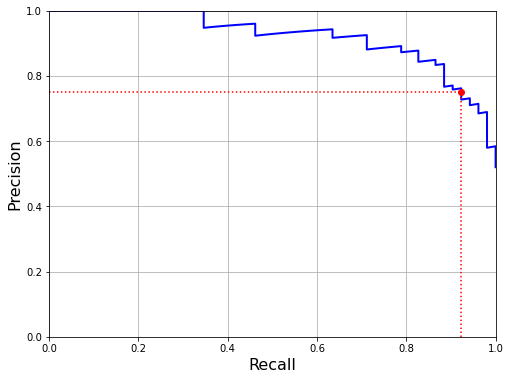

In [168]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.75], "r:")
plt.plot([0.0, recall_90_precision], [0.75, 0.75], "r:")
plt.plot([recall_90_precision], [0.75], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

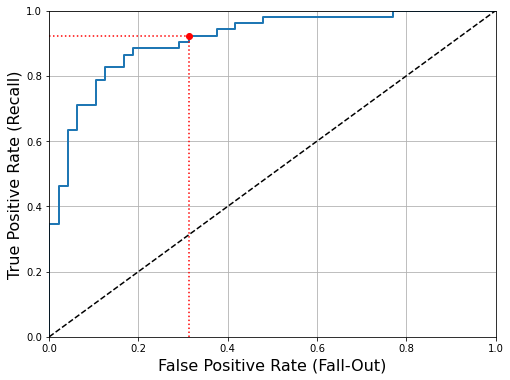

In [169]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# EXTRA

# Note

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized

a good way to reduce overfitting is to regularize the
model (i.e., to constrain it):
    
The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean

An important characteristic of Lasso Regression is that it tends to completely elimi‐
nate the weights of the least important features (i.e., set them to zero)

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge in Figure 2-12.
Stronger regularization pushes coefficients more and more toward
zero, though coefficients never become exactly zero. I

If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized

a good way to reduce overfitting is to regularize the
model (i.e., to constrain it):
    
The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean

An important characteristic of Lasso Regression is that it tends to completely elimi‐
nate the weights of the least important features (i.e., set them to zero)

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge in Figure 2-12.
Stronger regularization pushes coefficients more and more toward
zero, though coefficients never become exactly zero. I

If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features

# funs for curves

In [112]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [113]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [ ]:
roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))
for classifier_name in classifiers_dictionary:
    
    

    precisions, recalls, thresholds=  get_values_forPR(classifiers_dictionary[classifier_name], X_train,y_train)
    precision=precision[::-1]
    recall=recall[::-1]
    
    ax.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1)) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)